In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]
    
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)

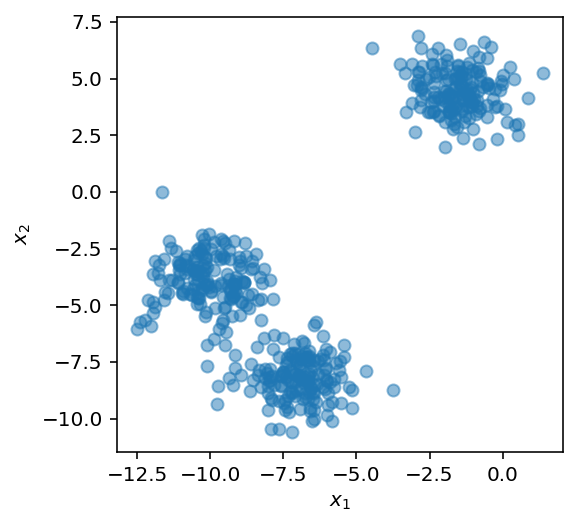

In [3]:
from sklearn.datasets import make_blobs

# Generate dataset
X, y = make_blobs(centers=3, n_samples=500, random_state=1)

# Visualize
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

In [7]:
k = 3
maxiter = 50

# Initialize our centroids by picking random data points
centroids = initialize_clusters(X, k)

# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
classes = np.zeros(X.shape[0], dtype=np.float64)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

# Loop for the maximum number of iterations
for i in range(maxiter):

    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X)

    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)

    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(X[classes == c], 0)

print(centroids)

print(classes)

[[ -7.0137239   -8.1914957 ]
 [ -1.51987091   4.43860945]
 [-10.05888302  -3.86593697]]
[2 2 0 1 0 1 2 0 2 0 0 0 0 1 2 0 1 0 1 0 2 0 2 1 0 0 1 1 2 2 2 1 2 2 2 2 1
 2 2 1 0 0 1 0 0 2 2 0 1 1 1 0 0 0 1 0 2 2 2 1 1 1 1 2 1 2 0 2 2 0 0 1 0 2
 0 2 2 0 0 1 2 1 0 1 1 1 1 1 2 0 1 2 2 0 1 2 2 0 2 1 1 2 1 1 1 2 2 1 1 2 2
 2 1 1 1 1 1 0 1 0 0 2 0 2 0 1 1 2 2 2 1 1 2 0 0 2 1 0 1 1 2 2 2 1 1 1 0 2
 0 0 0 1 1 0 1 0 0 2 2 1 2 1 1 1 0 0 0 0 1 2 1 2 0 1 2 0 2 0 2 0 1 1 0 2 0
 0 2 2 0 1 1 2 0 0 1 0 2 0 1 2 1 0 2 2 2 2 0 0 2 2 2 0 0 2 2 1 2 1 0 2 2 0
 2 2 1 0 2 1 0 1 2 2 1 1 2 0 1 0 0 1 0 0 0 2 0 1 0 1 0 1 1 0 0 1 2 1 0 2 1
 0 1 1 1 1 0 0 2 2 2 1 0 1 1 0 1 2 0 1 2 1 2 0 1 0 1 1 0 2 2 1 0 0 0 2 1 0
 2 2 0 2 2 2 2 2 0 2 0 0 1 1 0 0 0 1 1 0 2 1 1 0 2 1 1 0 1 1 1 0 0 2 1 2 0
 0 1 1 0 0 1 0 0 1 1 2 1 1 1 1 2 2 0 1 1 0 0 1 2 1 0 1 2 0 2 1 0 0 0 1 2 0
 2 2 2 2 2 2 1 2 1 1 2 1 0 1 0 2 1 2 1 2 0 1 2 2 2 1 1 0 2 0 1 0 0 0 0 0 2
 2 2 0 2 2 2 1 2 1 2 0 1 2 0 1 0 0 1 1 2 0 2 0 2 1 2 0 1 2 2 2 1 1 0 2 0 0
 2 2 2 0 0 0

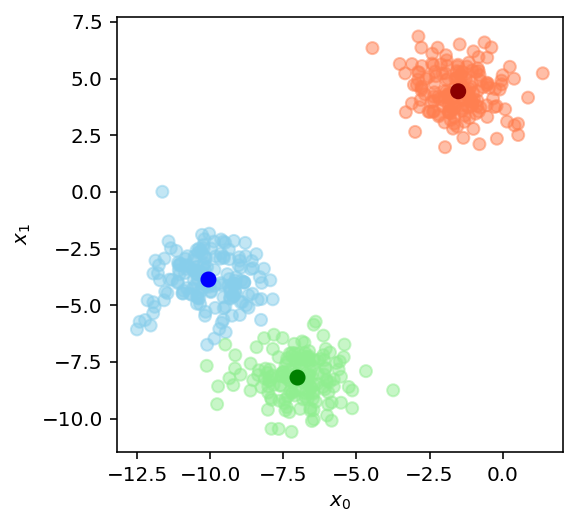

In [5]:
group_colors = ['skyblue', 'coral', 'lightgreen']
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$');